In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# ARIMA Code Along !

## Auto Regressive Integrated Moving Average

The general process for ARMA models is the following:

* Visualize the Time Series Data
* Make the Time Series data stationary
* Plot the Correlation and AutoCorrelation Charts: Correlogram
* Construct the ARIMA Model
* Use Model to make predictions

In [22]:
boeing_df =pd.read_csv("./data/BA.csv", index_col='Date', parse_dates=True)
#boeing_df = boeing_df.iloc[::-1]
boeing_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-13,202.500000,202.809998,195.550003,197.399994,197.399994,10619600
2021-12-14,195.600006,200.500000,195.179993,195.500000,195.500000,8445100
2021-12-15,195.279999,196.580002,190.320007,195.429993,195.429993,10535900
2021-12-16,197.000000,198.320007,190.440002,190.789993,190.789993,8216800
2021-12-17,190.270004,194.770004,187.880005,192.630005,192.630005,12618300


In [23]:
boeing_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,252.0,1.667499e+02,2.815444e+01,1.166500e+02,1.402075e+02,1.667550e+02,1.887425e+02,2.251000e+02
High,252.0,1.699309e+02,2.824235e+01,1.221900e+02,1.430450e+02,1.698850e+02,1.909650e+02,2.296700e+02
Low,252.0,1.637396e+02,2.803995e+01,1.130200e+02,1.378225e+02,1.643400e+02,1.850875e+02,2.242600e+02
Close,252.0,1.668480e+02,2.806776e+01,1.158600e+02,1.403675e+02,1.668400e+02,1.890050e+02,2.259600e+02
Adj Close,252.0,1.668480e+02,2.806776e+01,1.158600e+02,1.403675e+02,1.668400e+02,1.890050e+02,2.259600e+02
Volume,252.0,9.033674e+06,4.436854e+06,3.425200e+06,6.263375e+06,8.047800e+06,1.047220e+07,4.037170e+07


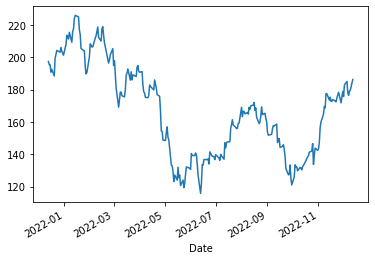

In [24]:
boeing_df['Adj Close'].plot()

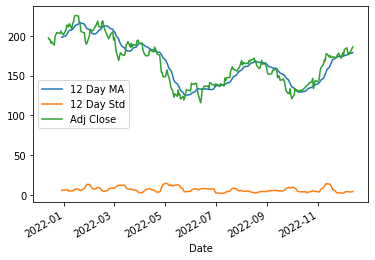

In [25]:
boeing_df['Adj Close'].rolling(12).mean().plot(label="12 Day MA")
boeing_df['Adj Close'].rolling(12).std().plot(label="12 Day Std")
boeing_df['Adj Close'].plot()
plt.legend();

In [27]:
boeing_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-06,184.009995,184.789993,177.009995,178.429993,178.429993,8236900
2022-12-07,176.279999,178.429993,174.619995,176.500000,176.500000,5871200
2022-12-08,179.320007,184.880005,178.610001,179.080002,179.080002,6707700
2022-12-09,180.750000,183.889999,179.250000,179.539993,179.539993,6348800
2022-12-12,180.800003,186.690002,180.500000,186.270004,186.270004,7840268


In [ ]:
# Test for stationarity

In [26]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels= ['ADF Test Statistic', 'p-Value', '# of lags','Num of Observations']
    
    for value, label in zip(result, labels):
        print(label + " : " + str(value))
    if result[1] <= 0.05:
        print("strong evidence against null hypothesis (rejected)")
        print("Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis (accepted or fail to reject)")
        print("Data does have a unit root and is not stationary")

In [34]:
adf_check(boeing_df["Adj Close"])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.4599192988679408
p-Value : 0.5532373905159691
# of lags : 0
Num of Observations : 251
weak evidence against null hypothesis (accepted or fail to reject)
Data does have a unit root and is not stationary


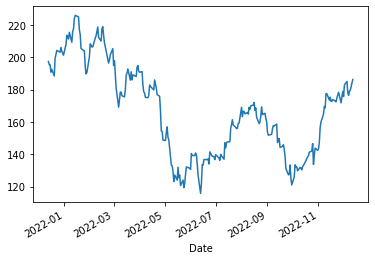

In [38]:
boeing_df["Adj Close"].plot()

In [35]:
boeing_df['First Difference'] = boeing_df['Adj Close'] - boeing_df['Adj Close'].shift(1)
boeing_df['First Difference'].dropna(inplace=True)

In [36]:
adf_check(boeing_df['First Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -15.169080198235442
p-Value : 6.428946345537728e-28
# of lags : 0
Num of Observations : 250
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


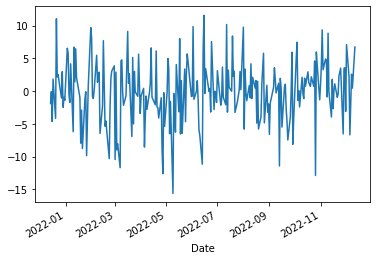

In [37]:
boeing_df['First Difference'].plot()

In [40]:
boeing_df['Second Difference'] = boeing_df['First Difference'] - boeing_df['First Difference'].shift(1)
boeing_df['Second Difference'].dropna(inplace=True)

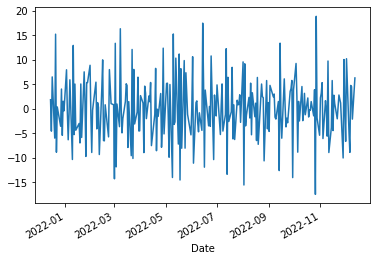

In [41]:
boeing_df['Second Difference'].plot();

In [42]:
adf_check(boeing_df['Second Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -8.656286308783912
p-Value : 4.958829316759137e-14
# of lags : 9
Num of Observations : 240
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


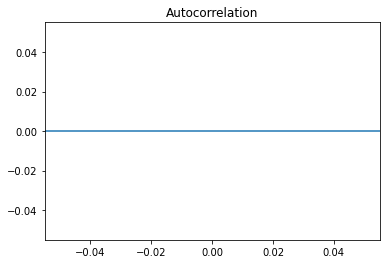

In [44]:
plot_acf(boeing_df['First Difference']);

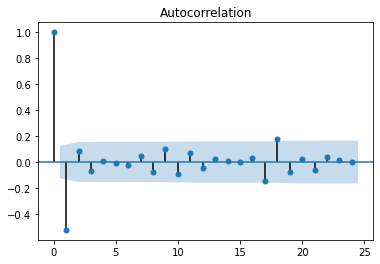

In [45]:
plot_acf(boeing_df['Second Difference']);

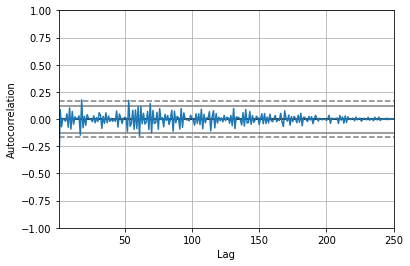

In [48]:
autocorrelation_plot(boeing_df['Second Difference']);

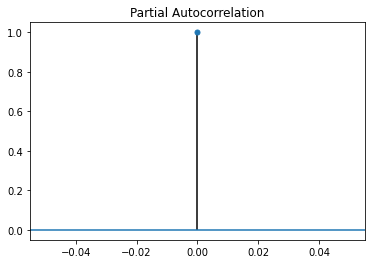

In [50]:
plot_pacf(boeing_df['First Difference']);

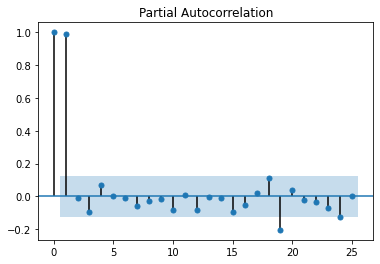

In [52]:
plot_pacf(boeing_df['Adj Close']);

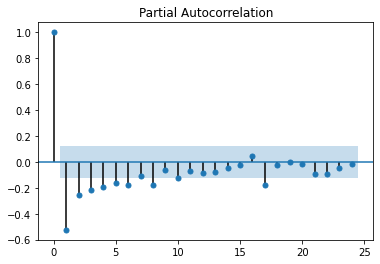

In [54]:
plot_pacf(boeing_df['Second Difference']);

In [55]:
# fun with &GSPC

In [56]:
spy_df =pd.read_csv("./data/SPY.csv", index_col='Date', parse_dates=True)
#boeing_df = boeing_df.iloc[::-1]
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375,95.746498,8164300
2000-01-04,143.53125,144.06250,139.640625,139.7500,92.002205,8089800
2000-01-05,139.93750,141.53125,137.250000,140.0000,92.166771,12177900
2000-01-06,139.62500,141.50000,137.750000,137.7500,90.685532,6227200
2000-01-07,140.31250,145.75000,140.062500,145.7500,95.952232,8066500


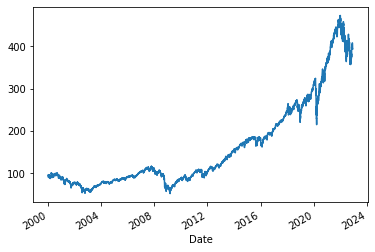

In [58]:
spy_df['Adj Close'].plot();

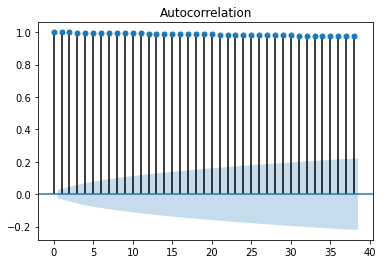

In [60]:
plot_acf(spy_df['Adj Close']);

In [61]:
adf_check(spy_df['Adj Close'])

Augmented Dicky-Fuller Test
ADF Test Statistic : 1.1608120061258929
p-Value : 0.9957036262137178
# of lags : 32
Num of Observations : 5740
weak evidence against null hypothesis (accepted or fail to reject)
Data does have a unit root and is not stationary


In [62]:
spy_df['First Difference'] = spy_df['Adj Close'] - spy_df['Adj Close'].shift(1)
spy_df['First Difference'].dropna(inplace=True)

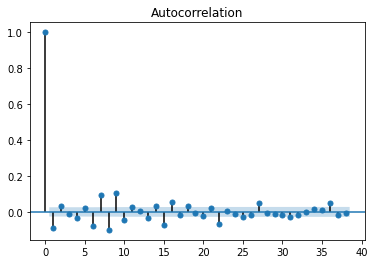

In [64]:
plot_acf(spy_df['First Difference']);

In [65]:
adf_check(spy_df['First Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -15.456180041156086
p-Value : 2.743399550864142e-28
# of lags : 31
Num of Observations : 5740
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


In [66]:
spy_df['Second Difference'] = spy_df['First Difference'] - spy_df['First Difference'].shift(1)
spy_df['Second Difference'].dropna(inplace=True)

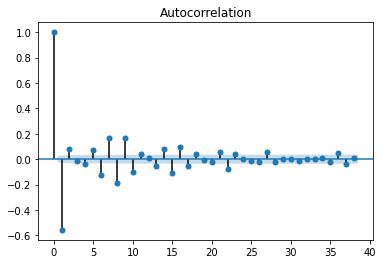

In [67]:
plot_acf(spy_df['Second Difference']);

In [69]:
adf_check(spy_df['Second Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -23.287465504423924
p-Value : 0.0
# of lags : 34
Num of Observations : 5736
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


In [70]:
spy_df['Third Difference'] = spy_df['Second Difference'] - spy_df['Second Difference'].shift(1)
spy_df['Third Difference'].dropna(inplace=True)

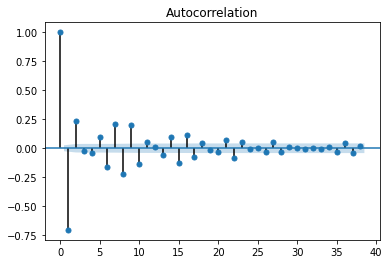

In [71]:
plot_acf(spy_df['Third Difference']);

In [72]:
adf_check(spy_df['Third Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -26.660141577907126
p-Value : 0.0
# of lags : 34
Num of Observations : 5735
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary
